##### Ana Daley (amd2yc@virginia.edu)
##### DS 5001 
##### 06 May 22

In [1]:
import pandas as pd
import numpy as np

In [2]:
from hac import HAC

In [3]:
from hw07 import create_bow
from hw07 import get_tfidf
from hw07 import get_pca

In [4]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

In [5]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [6]:
w2v_params = dict(
    min_count = 15,
    vector_size = 200,
    window = 3    
)

In [7]:
tsne_params = dict(
    learning_rate = 500.,
    perplexity = 100,
    n_components = 2,
    init = 'random',
    n_iter = 1000,
    random_state = 42    
)

In [8]:
OHCO = ['title', 'chap_num', 'para_num', 'sent_num', 'token_num']

SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]

In [9]:
LIB = pd.read_csv('LIB.csv')

In [10]:
CORPUS_Eng = pd.read_csv('CORPUS_English.csv')
CORPUS_Span = pd.read_csv('CORPUS_Spanish.csv')

In [11]:
CORPUS_Eng = CORPUS_Eng.loc[CORPUS_Eng.title != 'DON QUIXOTE']
CORPUS_Span = CORPUS_Span.loc[CORPUS_Span.title != 'DON QUIJOTE']

In [12]:
CORPUS_Span = CORPUS_Span.loc[CORPUS_Span.title != 'LA TIA FINGIDA.']

In [13]:
VOCAB_Eng = pd.read_csv('VOCAB_Eng.csv')
VOCAB_Span = pd.read_csv('VOCAB_Span.csv')

In [14]:
VOCAB_Eng.set_index('term_str', inplace=True)
VOCAB_Span.set_index('term_str', inplace=True)

## Analysis

In [15]:
BOW_Eng = create_bow(CORPUS_Eng, ['title'])
BOW_Span = create_bow(CORPUS_Span, ['title'])

In [16]:
TFIDF_Eng, DFIDF_Eng = get_tfidf(BOW_Eng, 'max', 'standard')
TFIDF_Span, DFIDF_Span = get_tfidf(BOW_Span, 'max', 'standard')

In [17]:
VOCAB_Eng.loc[VOCAB_Eng.pos.isin(['NN'])].sort_values('mean_tfidf', ascending = False).head(10)

,n,n_chars,p,i,mean_tfidf,dfidf,pos
term_str,,,,,,,
cadi,66,4,0.000800,10.286943,2.658512,3.584963,NN
duke,106,4,0.001286,9.603416,1.152828,5.169925,NN
grandfather,8,11,0.000097,13.331337,0.735377,3.584963,NN
maestro,12,7,0.000146,12.746374,0.597494,3.584963,NN
nag,8,3,0.000097,13.331337,0.585300,3.584963,NN
tent,12,4,0.000146,12.746374,0.483366,3.584963,NN
grandson,5,8,0.000061,14.009409,0.459611,3.584963,NN
hospital,18,8,0.000218,12.161412,0.443216,5.169925,NN
brigantine,11,10,0.000133,12.871905,0.443085,3.584963,NN


In [18]:
VOCAB_Span.loc[VOCAB_Span.pos.isin(['NOUN'])].sort_values('mean_tfidf', ascending = False).head(10)

,n,n_chars,p,i,mean_tfidf,dfidf,pos
term_str,,,,,,,
cadí,57,4,0.000613,10.672115,0.424829,3.584963,NOUN
duque,104,5,0.001118,9.804565,0.394115,5.169925,NOUN
nave,29,4,0.000312,11.647024,0.191462,3.584963,NOUN
dueña,37,5,0.000398,11.295552,0.158686,5.169925,NOUN
bajá,21,4,0.000226,12.112688,0.156516,3.584963,NOUN
alférez,28,7,0.000301,11.697650,0.122207,6.000000,NOUN
esclavas,11,8,0.000118,13.045574,0.119862,3.584963,NOUN
mantillas,10,9,0.000108,13.183077,0.104823,3.584963,NOUN
bajel,37,5,0.000398,11.295552,0.098194,5.169925,NOUN


In [19]:
VOCAB_Eng.loc[VOCAB_Eng.pos.isin(['JJ'])].sort_values('mean_tfidf', ascending = False).head(10)

,n,n_chars,p,i,mean_tfidf,dfidf,pos
term_str,,,,,,,
english,14,7,0.000170,12.523982,0.369040,3.584963,JJ
tunny,9,5,0.000109,13.161412,0.362524,3.584963,JJ
niña,13,4,0.000158,12.630897,0.293110,3.584963,JJ
catalonian,3,10,0.000036,14.746374,0.219488,3.584963,JJ
thecrucifix,2,11,0.000024,15.331337,0.183844,3.584963,JJ
ofglass,3,7,0.000036,14.746374,0.182286,3.584963,JJ
turkish,13,7,0.000158,12.630897,0.173733,5.169925,JJ
unequivocal,2,11,0.000024,15.331337,0.146325,3.584963,JJ
primary,2,7,0.000024,15.331337,0.146325,3.584963,JJ


In [20]:
VOCAB_Span.loc[VOCAB_Span.pos.isin(['ADJ'])].sort_values('mean_tfidf', ascending = False).head(10)

,n,n_chars,p,i,mean_tfidf,dfidf,pos
term_str,,,,,,,
ladueña,5,7,0.000054,14.183077,0.054483,3.584963,ADJ
católico,8,8,0.000086,13.505005,0.052817,3.584963,ADJ
lajitana,7,8,0.000075,13.697650,0.047438,3.584963,ADJ
inglesa,7,7,0.000075,13.697650,0.046215,3.584963,ADJ
enojado,4,7,0.000043,14.505005,0.044812,3.584963,ADJ
delduque,4,8,0.000043,14.505005,0.041929,3.584963,ADJ
vieja,66,5,0.000710,10.460611,0.035460,6.315172,ADJ
damascos,2,8,0.000022,15.505005,0.034637,3.584963,ADJ
norabuena,5,9,0.000054,14.183077,0.034273,3.584963,ADJ


In [21]:
#VOCAB_Span.to_csv('Span_VOC.csv')

#### Dendrogram

In [22]:
Dend_Eng = HAC(TFIDF_Eng)
Dend_Eng.labels = TFIDF_Eng.index.to_list()
Dend_Eng.h = len(TFIDF_Eng) * 1.25
Dend_Eng.w = 8

<Figure size 432x288 with 0 Axes>

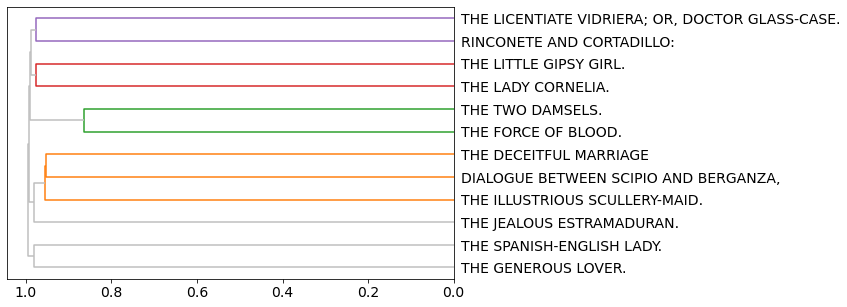

In [23]:
Dend_Eng.plot()

In [24]:
Dend_Span = HAC(TFIDF_Span)
Dend_Span.labels = TFIDF_Span.index.to_list()
Dend_Span.h = len(TFIDF_Eng) * 1.25
Dend_Span.w = 7

<Figure size 432x288 with 0 Axes>

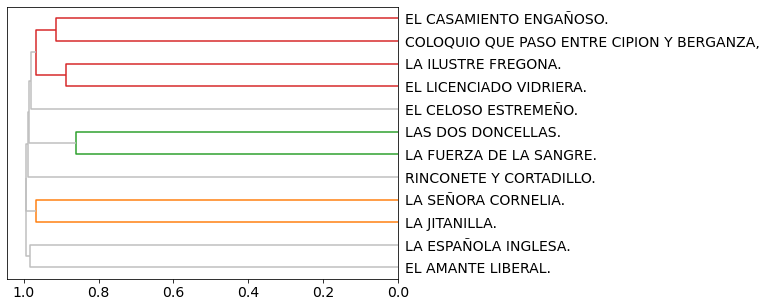

In [25]:
Dend_Span.plot()

#### TSNE/word2vec

In [26]:
CORPUS_Eng.set_index(OHCO, inplace=True)
CORPUS_Span.set_index(OHCO, inplace=True)

In [27]:
Eng_sents = CORPUS_Eng.groupby(OHCO[:-1]).term_str.apply(lambda  x:  x.tolist())
Span_sents = CORPUS_Span.groupby(OHCO[:-1]).term_str.apply(lambda  x:  x.tolist())

In [28]:
Eng_mod = word2vec.Word2Vec(Eng_sents.values, **w2v_params)
Span_mod = word2vec.Word2Vec(Span_sents.values, **w2v_params)

In [29]:
Eng_W2V = pd.DataFrame(Eng_mod.wv.get_normed_vectors(), index=Eng_mod.wv.index_to_key)
Eng_W2V.index.name = 'term_str'
Eng_W2V = Eng_W2V.sort_index()

In [30]:
Eng_W2V.to_csv('W2V_English.csv')

In [31]:
Span_W2V = pd.DataFrame(Span_mod.wv.get_normed_vectors(), index=Span_mod.wv.index_to_key)
Span_W2V.index.name = 'term_str'
Span_W2V = Span_W2V.sort_index()

In [32]:
Span_W2V.to_csv('W2V_Spanish.csv')

In [33]:
Eng_tsne_engine = TSNE(**tsne_params)
Eng_tsne_mod = Eng_tsne_engine.fit_transform(Eng_W2V)

Eng_COORDS = pd.DataFrame(Eng_tsne_mod, columns=['x','y'], index=Eng_W2V.index)\
.join(VOCAB_Eng, how='left')[['x','y','n','pos']]

In [34]:
Span_tsne_engine = TSNE(**tsne_params)
Span_tsne_mod = Span_tsne_engine.fit_transform(Span_W2V)

Span_COORDS = pd.DataFrame(Span_tsne_mod, columns=['x','y'], index=Span_W2V.index)\
.join(VOCAB_Span, how='left')[['x','y','n','pos']]

In [35]:
Eng_COORDS.dropna(inplace=True)
Span_COORDS.dropna(inplace=True)

In [158]:
Eng_COORDS = Eng_COORDS.loc[Eng_COORDS.index != 'scip']
Eng_COORDS = Eng_COORDS.loc[Eng_COORDS.index != 'berg']

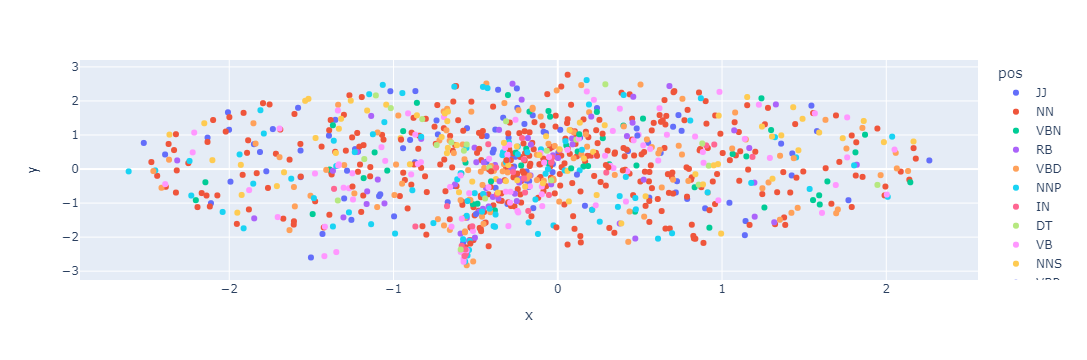

In [159]:
px.scatter(Eng_COORDS.reset_index(), 'x', 'y',
          hover_name = 'term_str', 
          color = 'pos')

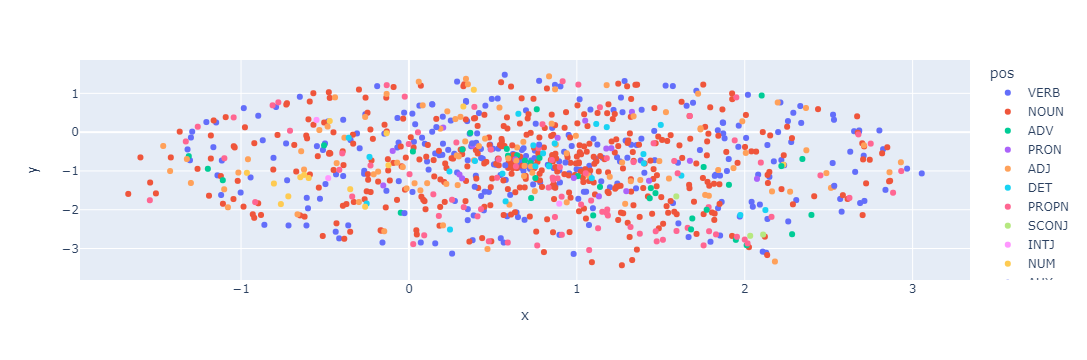

In [38]:
px.scatter(Span_COORDS.reset_index(), 'x', 'y',
          hover_name = 'term_str', 
          color = 'pos')

#### PCA

In [39]:
#CORPUS = CORPUS_Eng.append(CORPUS_Span)

In [40]:
BOW_Eng = create_bow(CORPUS_Eng, ['title', 'chap_num'])

In [41]:
TFIDF_Eng, DFIDF_Eng = get_tfidf(BOW_Eng, 'max', 'standard')

In [42]:
VOCAB_Eng['language'] = 'English'
VOCAB_Span['language'] = 'Spanish'
#VOCAB = VOCAB_Eng.append(VOCAB_Span)

In [43]:
SIGS_Eng = VOCAB_Eng.loc[VOCAB_Eng.pos.isin(['NN', 'NNS', 'NOUN'])]

SIGS_Eng = SIGS_Eng.sort_values('dfidf', ascending=False).index
VOCAB_Eng = VOCAB_Eng.loc[SIGS_Eng]
TFIDF_Eng = TFIDF_Eng[SIGS_Eng]

In [44]:
DOC_Eng = pd.DataFrame(index=TFIDF_Eng.index)
DOC_Eng.reset_index(inplace=True)

In [45]:
DOC_Eng.title.replace({'DIALOGUE BETWEEN SCIPIO AND BERGANZA,':'DIALOGUE BETWEEN SCIPIO AND BERGANZA',
 'EL AMANTE LIBERAL.':'EL AMANTE LIBERAL',
 'EL CASAMIENTO ENGAÑOSO.': 'EL CASAMIENTO ENGAÑOSO',
 'EL CELOSO ESTREMEÑO.':'EL CELOSO ESTREMEÑO',
 'EL LICENCIADO VIDRIERA.':'EL LICENCIADO VIDRIERA',
 'LA ESPAÑOLA INGLESA.':'LA ESPAÑOLA INGLESA',
 'LA FUERZA DE LA SANGRE.':'LA FUERZA DE LA SANGRE',
 'LA ILUSTRE FREGONA.':'LA ILUSTRE FREGONA',
 'LA JITANILLA.':'LA JITANILLA',
 'LA SEÑORA CORNELIA.':'LA SEÑORA CORNELIA',
 'LA TIA FINGIDA.':'LA TIA FINGIDA',
 'LAS DOS DONCELLAS.':'LAS DOS DONCELLAS',
 'RINCONETE AND CORTADILLO:':'RINCONETE AND CORTADILLO',
 'RINCONETE Y CORTADILLO.':'RINCONETE Y CORTADILLO',
 'THE FORCE OF BLOOD.':'THE FORCE OF BLOOD',
 'THE GENEROUS LOVER.':'THE GENEROUS LOVER',
 'THE ILLUSTRIOUS SCULLERY-MAID.':'THE ILLUSTRIOUS SCULLERY-MAID',
 'THE JEALOUS ESTRAMADURAN.':'THE JEALOUS ESTRAMADURAN',
 'THE LADY CORNELIA.':'THE LADY CORNELIA',
 'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE.':'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE',
 'THE LITTLE GIPSY GIRL.': 'THE LITTLE GIPSY GIRL',
 'THE SPANISH-ENGLISH LADY.':'THE SPANISH-ENGLISH LADY',
 'THE TWO DAMSELS.':'THE TWO DAMSELS',
 'COLOQUIO QUE PASO ENTRE CIPION Y BERGANZA,':'COLOQUIO QUE PASÓ ENTRE CIPION Y BERGANZA'}, inplace=True)

In [46]:
LIB.rename(columns={'Title':'title'}, inplace=True)

In [47]:
LIB = LIB[['title','Language']]

In [48]:
LIB_Eng = LIB[LIB.Language == 'English']

In [49]:
DOC_Eng.set_index('title', inplace=True)

In [50]:
LIB_Eng.set_index('title', inplace=True)
DOC_Eng = DOC_Eng.join(LIB_Eng, on='title')
DOC_Eng.reset_index(inplace = True)

In [51]:
LOADINGS_Eng, DCM_Eng, COMPINF_Eng = get_pca(TFIDF_Eng, k=3)

In [52]:
LOADINGS_Eng.to_csv('LOADINGS_English.csv')
DCM_Eng.to_csv('DCM_English.csv')
COMPINF_Eng.to_csv('COMPS_English.csv')

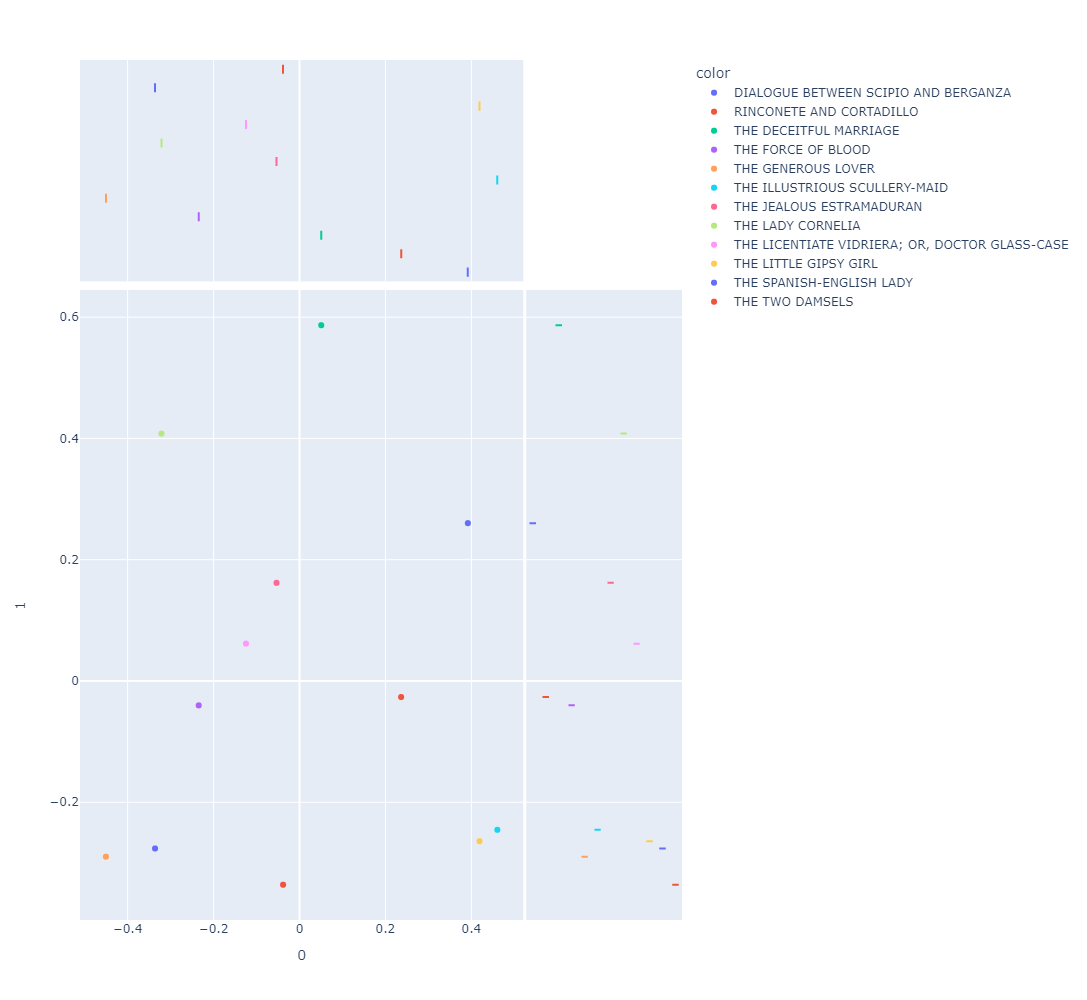

In [53]:
px.scatter(DCM_Eng, 0, 1,
           color = DOC_Eng.title,
           height=1000, width=1200, 
           marginal_x='box', marginal_y='box')

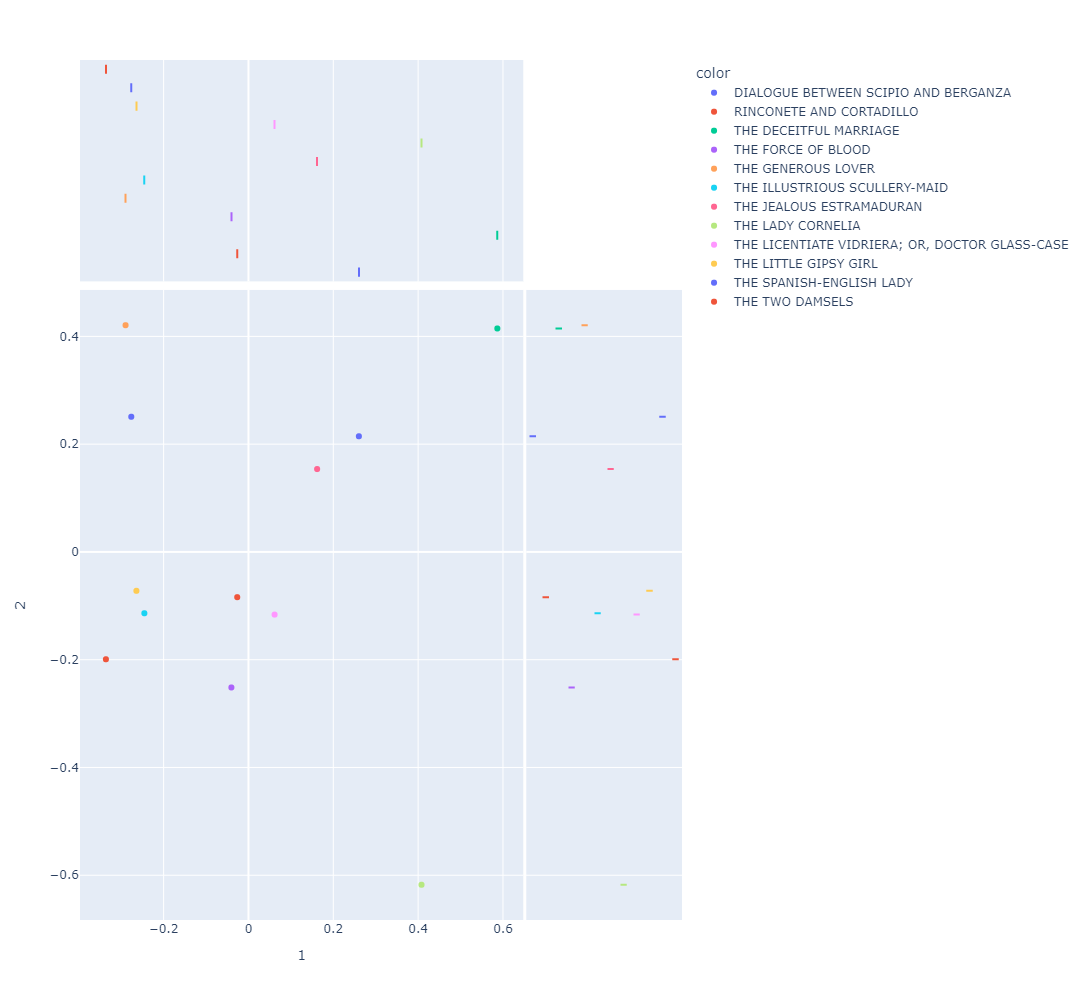

In [54]:
px.scatter(DCM_Eng, 1, 2,
           color = DOC_Eng.title,
           height=1000, width=1200, 
           marginal_x='box', marginal_y='box')

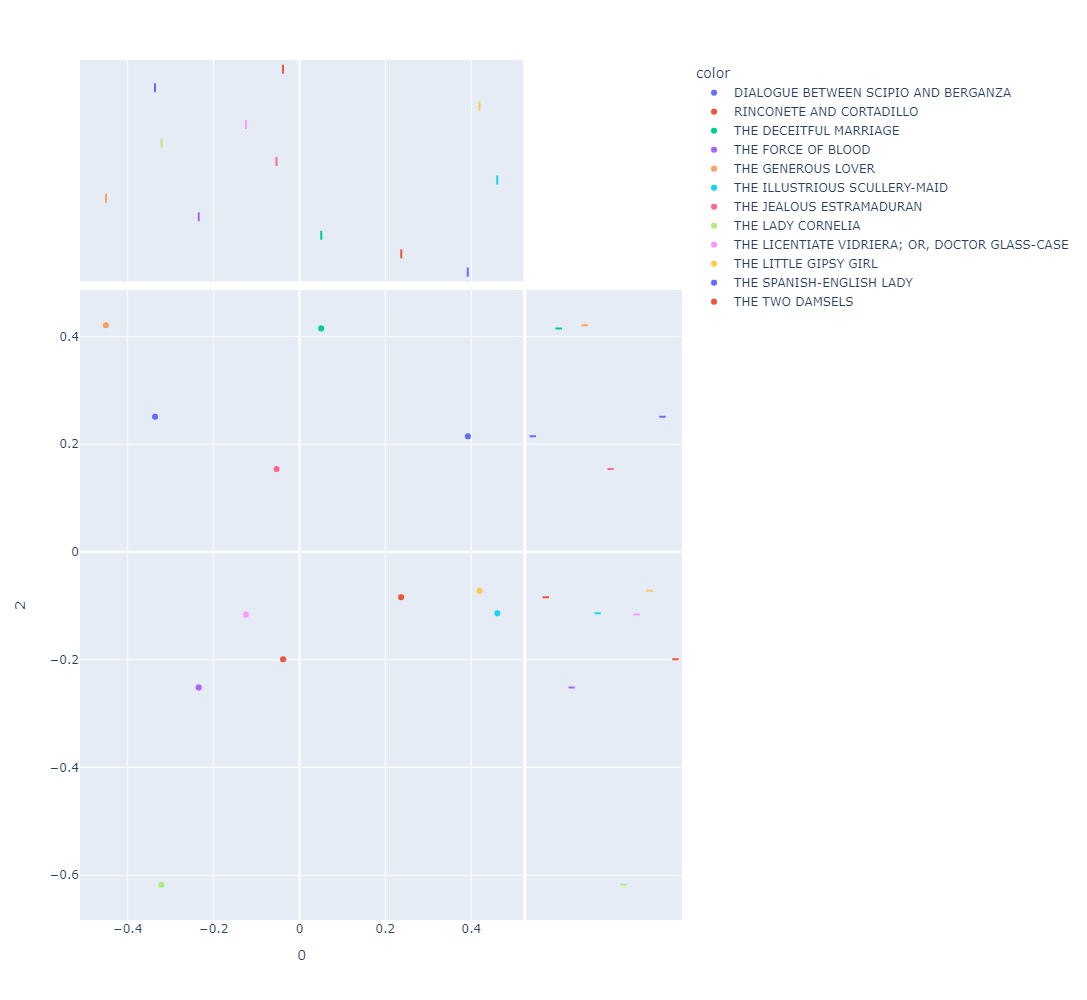

In [55]:
px.scatter(DCM_Eng, 0, 2,
           color = DOC_Eng.title,
           height=1000, width=1200, 
           marginal_x='box', marginal_y='box')

In [56]:
BOW_Span = create_bow(CORPUS_Span, ['title', 'chap_num'])

In [57]:
TFIDF_Span, DFIDF_Span = get_tfidf(BOW_Span, 'max', 'standard')

In [58]:
SIGS_Span = VOCAB_Span.loc[VOCAB_Span.pos.isin(['NN', 'NNS', 'NOUN'])]

SIGS_Span = SIGS_Span.sort_values('dfidf', ascending=False).index
VOCAB_Span = VOCAB_Span.loc[SIGS_Span]
TFIDF_Span = TFIDF_Span[SIGS_Span]

In [59]:
DOC_Span = pd.DataFrame(index=TFIDF_Span.index)
DOC_Span.reset_index(inplace=True)

In [60]:
DOC_Span.title.replace({'DIALOGUE BETWEEN SCIPIO AND BERGANZA,':'DIALOGUE BETWEEN SCIPIO AND BERGANZA',
 'EL AMANTE LIBERAL.':'EL AMANTE LIBERAL',
 'EL CASAMIENTO ENGAÑOSO.': 'EL CASAMIENTO ENGAÑOSO',
 'EL CELOSO ESTREMEÑO.':'EL CELOSO ESTREMEÑO',
 'EL LICENCIADO VIDRIERA.':'EL LICENCIADO VIDRIERA',
 'LA ESPAÑOLA INGLESA.':'LA ESPAÑOLA INGLESA',
 'LA FUERZA DE LA SANGRE.':'LA FUERZA DE LA SANGRE',
 'LA ILUSTRE FREGONA.':'LA ILUSTRE FREGONA',
 'LA JITANILLA.':'LA JITANILLA',
 'LA SEÑORA CORNELIA.':'LA SEÑORA CORNELIA',
 'LA TIA FINGIDA.':'LA TIA FINGIDA',
 'LAS DOS DONCELLAS.':'LAS DOS DONCELLAS',
 'RINCONETE AND CORTADILLO:':'RINCONETE AND CORTADILLO',
 'RINCONETE Y CORTADILLO.':'RINCONETE Y CORTADILLO',
 'THE FORCE OF BLOOD.':'THE FORCE OF BLOOD',
 'THE GENEROUS LOVER.':'THE GENEROUS LOVER',
 'THE ILLUSTRIOUS SCULLERY-MAID.':'THE ILLUSTRIOUS SCULLERY-MAID',
 'THE JEALOUS ESTRAMADURAN.':'THE JEALOUS ESTRAMADURAN',
 'THE LADY CORNELIA.':'THE LADY CORNELIA',
 'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE.':'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE',
 'THE LITTLE GIPSY GIRL.': 'THE LITTLE GIPSY GIRL',
 'THE SPANISH-ENGLISH LADY.':'THE SPANISH-ENGLISH LADY',
 'THE TWO DAMSELS.':'THE TWO DAMSELS',
 'COLOQUIO QUE PASO ENTRE CIPION Y BERGANZA,':'COLOQUIO QUE PASÓ ENTRE CIPION Y BERGANZA'}, inplace=True)

In [61]:
LIB_Span = LIB[LIB.Language == 'Spanish']

In [62]:
DOC_Span.set_index('title', inplace=True)

In [63]:
LIB_Span.set_index('title', inplace=True)
DOC_Span = DOC_Span.join(LIB_Span, on='title')
DOC_Span.reset_index(inplace = True)

In [64]:
LOADINGS_Span, DCM_Span, COMPINF_Span = get_pca(TFIDF_Span, k=3)

In [65]:
LOADINGS_Span.to_csv('LOADINGS_Spanish.csv')
DCM_Span.to_csv('DCM_Spanish.csv')
COMPINF_Span.to_csv('COMPS_Spanish.csv')

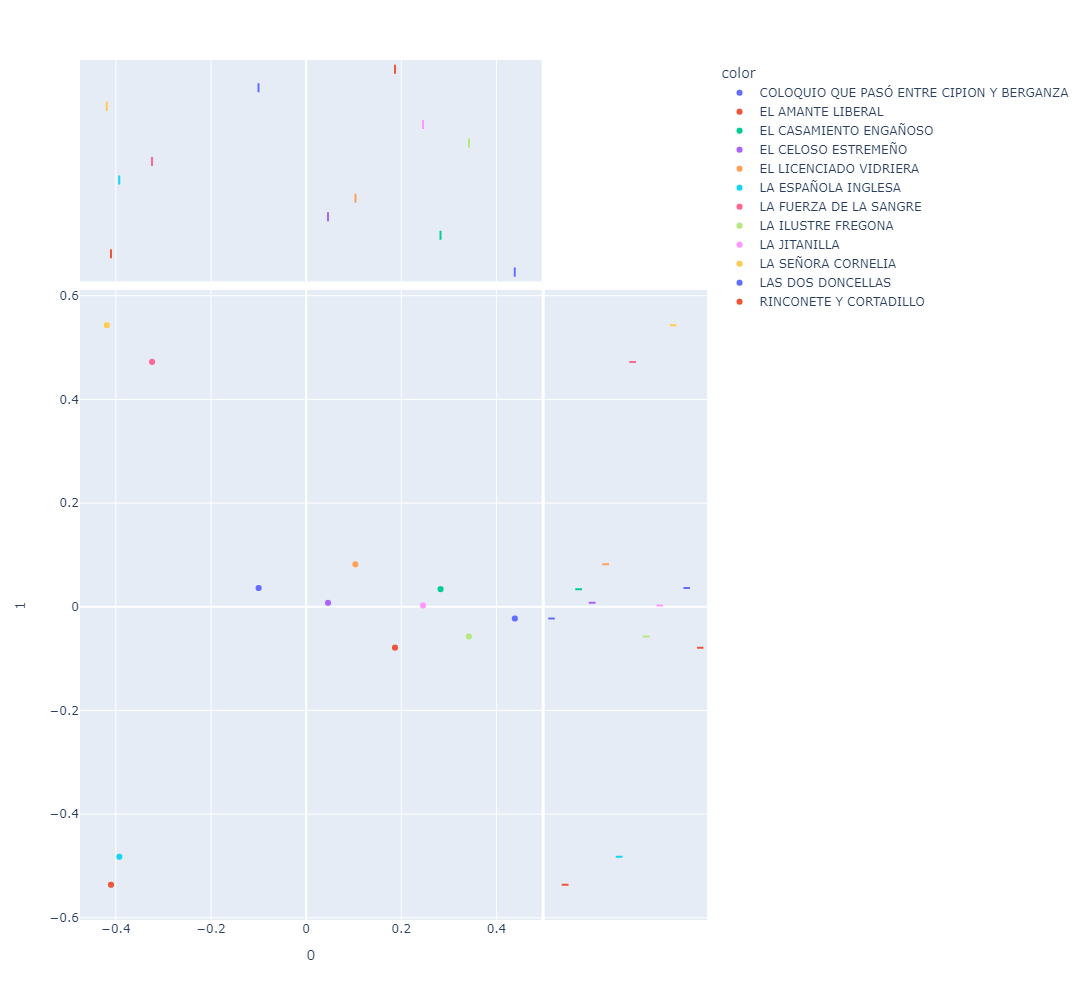

In [66]:
px.scatter(DCM_Span, 0, 1,
           color = DOC_Span.title,
           height=1000, width=1200, 
           marginal_x='box', marginal_y='box')

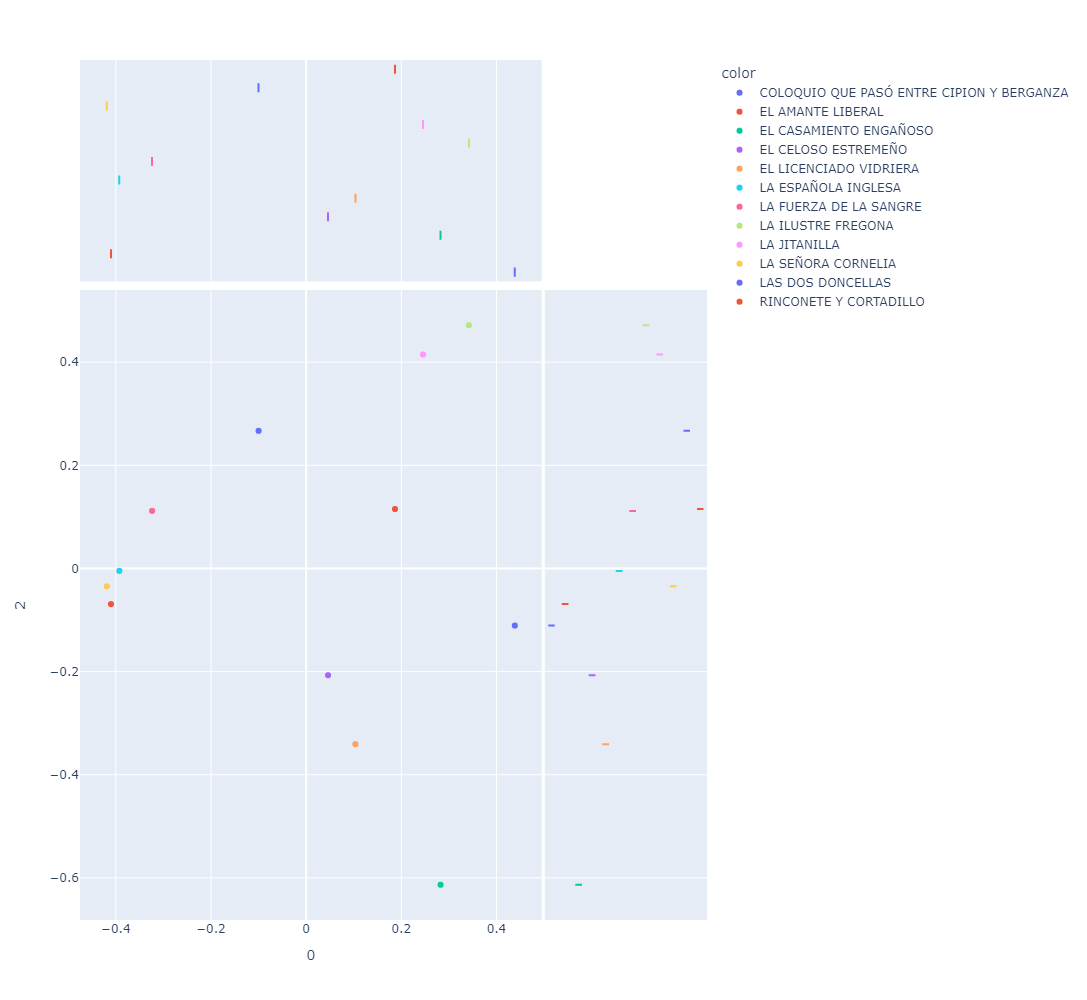

In [67]:
px.scatter(DCM_Span, 0, 2,
           color = DOC_Span.title,
           height=1000, width=1200, 
           marginal_x='box', marginal_y='box')

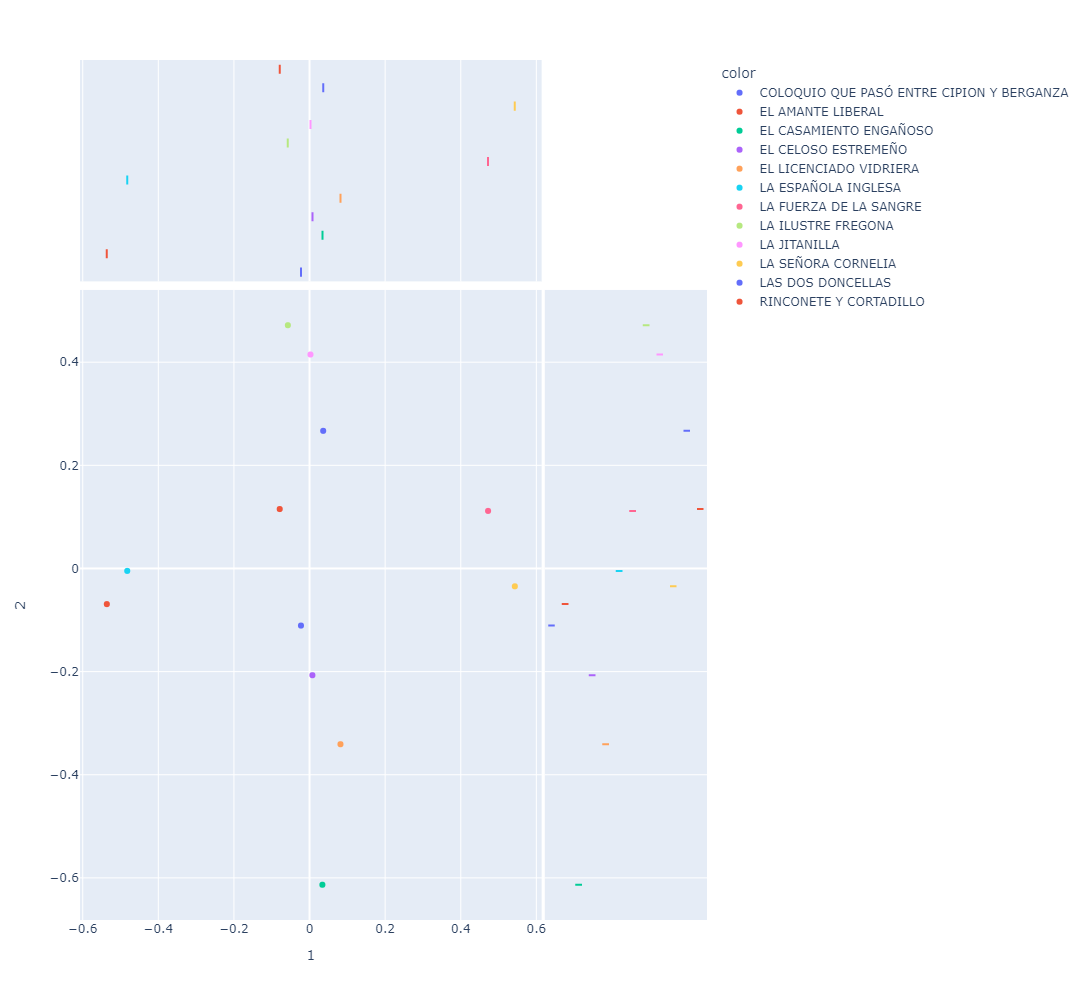

In [68]:
px.scatter(DCM_Span, 1, 2,
           color = DOC_Span.title,
           height=1000, width=1200, 
           marginal_x='box', marginal_y='box')

In [69]:
CORPUS = CORPUS_Eng.append(CORPUS_Span)

In [70]:
BOW = create_bow(CORPUS, ['title', 'chap_num'])

In [71]:
TFIDF, DFIDF = get_tfidf(BOW, 'log', 'sklearn_smooth')

In [72]:
VOCAB = VOCAB_Eng.append(VOCAB_Span)

In [73]:
SIGS = VOCAB.loc[VOCAB.pos.isin(['NN', 'NNS', 'NOUN'])]

SIGS = SIGS.sort_values('dfidf', ascending=False).index
VOCAB = VOCAB.loc[SIGS]
TFIDF = TFIDF[SIGS]

In [74]:
DOC = pd.DataFrame(index=TFIDF.index)
DOC.reset_index(inplace=True)

In [75]:
DOC.title.replace({'DIALOGUE BETWEEN SCIPIO AND BERGANZA,':'DIALOGUE BETWEEN SCIPIO AND BERGANZA',
 'EL AMANTE LIBERAL.':'EL AMANTE LIBERAL',
 'EL CASAMIENTO ENGAÑOSO.': 'EL CASAMIENTO ENGAÑOSO',
 'EL CELOSO ESTREMEÑO.':'EL CELOSO ESTREMEÑO',
 'EL LICENCIADO VIDRIERA.':'EL LICENCIADO VIDRIERA',
 'LA ESPAÑOLA INGLESA.':'LA ESPAÑOLA INGLESA',
 'LA FUERZA DE LA SANGRE.':'LA FUERZA DE LA SANGRE',
 'LA ILUSTRE FREGONA.':'LA ILUSTRE FREGONA',
 'LA JITANILLA.':'LA JITANILLA',
 'LA SEÑORA CORNELIA.':'LA SEÑORA CORNELIA',
 'LA TIA FINGIDA.':'LA TIA FINGIDA',
 'LAS DOS DONCELLAS.':'LAS DOS DONCELLAS',
 'RINCONETE AND CORTADILLO:':'RINCONETE AND CORTADILLO',
 'RINCONETE Y CORTADILLO.':'RINCONETE Y CORTADILLO',
 'THE FORCE OF BLOOD.':'THE FORCE OF BLOOD',
 'THE GENEROUS LOVER.':'THE GENEROUS LOVER',
 'THE ILLUSTRIOUS SCULLERY-MAID.':'THE ILLUSTRIOUS SCULLERY-MAID',
 'THE JEALOUS ESTRAMADURAN.':'THE JEALOUS ESTRAMADURAN',
 'THE LADY CORNELIA.':'THE LADY CORNELIA',
 'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE.':'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE',
 'THE LITTLE GIPSY GIRL.': 'THE LITTLE GIPSY GIRL',
 'THE SPANISH-ENGLISH LADY.':'THE SPANISH-ENGLISH LADY',
 'THE TWO DAMSELS.':'THE TWO DAMSELS',
 'COLOQUIO QUE PASO ENTRE CIPION Y BERGANZA,':'COLOQUIO QUE PASÓ ENTRE CIPION Y BERGANZA'}, inplace=True)

In [76]:
DOC.set_index('title', inplace=True)

In [77]:
LIB.set_index('title', inplace=True)
DOC = DOC.join(LIB, on='title')
DOC.reset_index(inplace = True)

In [78]:
DOC.title.replace({'DIALOGUE BETWEEN SCIPIO AND BERGANZA':'DIALOGUE BETWEEN SCIPIO AND BERGANZA',
 'EL AMANTE LIBERAL':'THE GENEROUS LOVER',
 'DON QUIXOTE':'DON QUIJOTE',
 'EL CASAMIENTO ENGAÑOSO': 'THE DECEITFUL MARRIAGE',
 'EL CELOSO ESTREMEÑO':'THE JEALOUS ESTRAMADURAN',
 'EL LICENCIADO VIDRIERA':'THE LICENTIATE VIDRIERA',
 'LA ESPAÑOLA INGLESA':'THE SPANISH-ENGLISH LADY',
 'LA FUERZA DE LA SANGRE':'THE FORCE OF BLOOD',
 'LA ILUSTRE FREGONA':'THE ILLUSTRIOUS SCULLERY-MAID',
 'LA JITANILLA':'THE LITTLE GIPSY GIRL',
 'LA SEÑORA CORNELIA':'THE LADY CORNELIA',
 'LA TIA FINGIDA':'LA TIA FINGIDA',
 'LAS DOS DONCELLAS':'THE TWO DAMSELS',
 'RINCONETE AND CORTADILLO':'RINCONETE AND CORTADILLO',
 'RINCONETE Y CORTADILLO':'RINCONETE AND CORTADILLO',
 'THE FORCE OF BLOOD':'THE FORCE OF BLOOD',
 'THE GENEROUS LOVER':'THE GENEROUS LOVER',
 'THE ILLUSTRIOUS SCULLERY-MAID':'THE ILLUSTRIOUS SCULLERY-MAID',
 'THE JEALOUS ESTRAMADURAN':'THE JEALOUS ESTRAMADURAN',
 'THE LADY CORNELIA':'THE LADY CORNELIA',
 'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE':'THE LICENTIATE VIDRIERA',
 'THE LITTLE GIPSY GIRL': 'THE LITTLE GIPSY GIRL',
 'THE SPANISH-ENGLISH LADY':'THE SPANISH-ENGLISH LADY',
 'THE TWO DAMSELS':'THE TWO DAMSELS',
 'COLOQUIO QUE PASÓ ENTRE CIPION Y BERGANZA':'DIALOGUE BETWEEN SCIPIO AND BERGANZA'}, inplace=True)

In [79]:
#LOADINGS, DCM, COMPINF = get_pca(TFIDF, k=3)

In [80]:
#LOADINGS.to_csv('LOADINGS.csv')
#DCM.to_csv('DCM.csv')
#COMPINF.to_csv('COMPS.csv')

In [81]:
#px.scatter(DCM, 0, 1,
#           color = DOC.title, symbol = DOC.Language,
#           height=1000, width=1200, 
#           marginal_x='box', marginal_y='box')

In [82]:
#px.scatter(DCM, 0, 2,
#           color = DOC.title, symbol = DOC.Language,
#           height=1000, width=1200, 
#           marginal_x='box', marginal_y='box')

In [83]:
#px.scatter(DCM, 1, 2,
#           color = DOC.title, symbol = DOC.Language,
#           height=1000, width=1200, 
#           marginal_x='box', marginal_y='box')

#### LDA

In [84]:
n_terms = 500
n_topics = 5
max_iter = 20
doc_topic_prior = .1 
topic_word_prior = .1

##### English

In [85]:
BOW_Eng = create_bow(CORPUS_Eng, ['title', 'chap_num'])
BOW_Span = create_bow(CORPUS_Span, ['title', 'chap_num'])

In [86]:
X_Eng = BOW_Eng.n.unstack(fill_value=0)[SIGS_Eng]

In [87]:
DOC_Eng = DOC_Eng.set_index(X_Eng.index)

In [88]:
lda_Eng = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [89]:
THETA_Eng = pd.DataFrame(lda_Eng.fit_transform(X_Eng.values), index=X_Eng.index)
THETA_Eng.columns.name = 'topic_id'

In [90]:
THETA_Eng.style.background_gradient(cmap='GnBu', high=.5, axis=1)

,topic_id,0,1,2,3,4
title,chap_num,,,,,
"DIALOGUE BETWEEN SCIPIO AND BERGANZA,",1,0.000048,0.000048,0.999807,0.000048,0.000048
RINCONETE AND CORTADILLO:,1,0.000062,0.000062,0.999752,0.000061,0.000062
THE DECEITFUL MARRIAGE,1,0.000238,0.999049,0.000239,0.000234,0.000239
THE FORCE OF BLOOD.,1,0.000151,0.110696,0.000151,0.000148,0.888853
THE GENEROUS LOVER.,1,0.000071,0.000071,0.000071,0.000070,0.999716
THE ILLUSTRIOUS SCULLERY-MAID.,1,0.999760,0.000060,0.000060,0.000059,0.000060
THE JEALOUS ESTRAMADURAN.,1,0.000081,0.000081,0.000081,0.000080,0.999677
THE LADY CORNELIA.,1,0.000073,0.999708,0.000073,0.000072,0.000074
"THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE.",1,0.999577,0.000106,0.000106,0.000104,0.000107


In [91]:
PHI_Eng = pd.DataFrame(lda_Eng.components_, columns=X_Eng.columns)
PHI_Eng.index.name = 'topic_id'
PHI_Eng.columns.name  = 'term_str'

In [92]:
PHI_Eng.T.head(10).style.background_gradient(cmap='GnBu', high=.5, axis=0)

topic_id,0,1,2,3,4
term_str,,,,,
bottom,0.200000,0.200000,2.200000,0.200000,4.199999
ability,3.200010,1.199995,1.199995,0.200000,0.200000
class,1.200002,0.200498,1.200001,0.200000,2.199499
event,0.200000,6.184765,3.200033,0.200000,0.215202
thelatter,0.200000,0.200314,1.199999,0.200000,3.199686
heavens,0.200000,2.200002,0.200000,0.200000,3.199998
assent,0.200000,1.200000,2.200008,0.200000,1.199992
angels,2.200029,1.199979,0.200000,0.200000,1.199992
butit,0.200000,1.199999,1.200000,0.200000,2.200001


In [93]:
TOPIC_Eng = PHI_Eng.sum(1).to_frame('phi_sum')
TOPIC_Eng['theta_sum'] = THETA_Eng.sum()

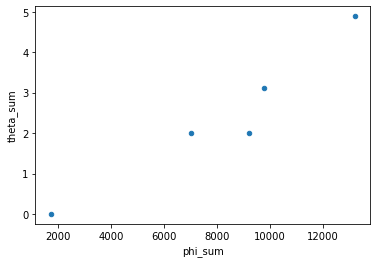

In [94]:
TOPIC_Eng.plot.scatter('phi_sum','theta_sum');

In [95]:
PHI_P = (PHI_Eng.T / PHI_Eng.T.sum())
PHI_I = np.log2(1/PHI_P)
TOPIC_Eng['h'] = round((PHI_I * PHI_P).sum().sort_values(ascending=False), 2)

In [96]:
n_top_terms = round(TOPIC_Eng.h.mean())

In [97]:
TOPIC_Eng['top_terms'] = PHI_Eng.apply(lambda x: ' '.join(x.sort_values(ascending=False).head(n_top_terms).index), 1)
TOPIC_Eng['label'] = TOPIC_Eng.apply(lambda x: f"{x.name}: {x.top_terms}", 1)

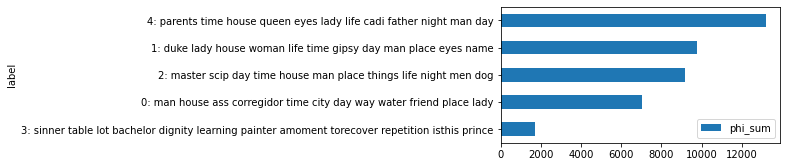

In [98]:
TOPIC_Eng.sort_values('phi_sum', ascending=True).plot.barh(y='phi_sum', x='label', figsize=(5, n_topics/2));

In [99]:
THETA_Eng.to_csv('LDA_THETA_English.csv')

In [100]:
PHI_Eng.T.to_csv('LDA_PHI_English.csv')

##### Spanish

In [101]:
X_Span = BOW_Span.n.unstack(fill_value=0)[SIGS_Span]
DOC_Span = DOC_Span.set_index(X_Span.index)

In [102]:
lda_Span = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [103]:
THETA_Span = pd.DataFrame(lda_Span.fit_transform(X_Span.values), index=X_Span.index)
THETA_Span.columns.name = 'topic_id'

In [104]:
THETA_Span.style.background_gradient(cmap='GnBu', high=.5, axis=1)

,topic_id,0,1,2,3,4
title,chap_num,,,,,
"COLOQUIO QUE PASO ENTRE CIPION Y BERGANZA,",1,0.000049,0.000049,0.999803,0.000050,0.000049
EL AMANTE LIBERAL.,1,0.000064,0.000063,0.000064,0.999746,0.000064
EL CASAMIENTO ENGAÑOSO.,1,0.000231,0.000228,0.000234,0.999075,0.000232
EL CELOSO ESTREMEÑO.,1,0.000084,0.000083,0.999664,0.000085,0.000085
EL LICENCIADO VIDRIERA.,1,0.000117,0.000114,0.000117,0.999536,0.000116
LA ESPAÑOLA INGLESA.,1,0.000071,0.000070,0.000071,0.999717,0.000071
LA FUERZA DE LA SANGRE.,1,0.000144,0.000142,0.000145,0.000145,0.999424
LA ILUSTRE FREGONA.,1,0.000057,0.000056,0.999773,0.000057,0.000057
LA JITANILLA.,1,0.000049,0.000048,0.000049,0.999806,0.000049


In [105]:
PHI_Span = pd.DataFrame(lda_Span.components_, columns=X_Span.columns)
PHI_Span.index.name = 'topic_id'
PHI_Span.columns.name  = 'term_str'

In [106]:
PHI_Span.T.head(10).style.background_gradient(cmap='GnBu', high=.5, axis=0)

topic_id,0,1,2,3,4
term_str,,,,,
precio,1.199994,0.200000,0.200000,13.200006,0.200000
camaradas,0.200000,0.200000,1.199959,3.199942,9.200098
quilates,0.200000,0.200000,3.200004,2.199995,0.200000
salvo,2.200029,0.200000,1.199979,2.199992,0.200000
gloria,0.200000,0.200000,3.199988,9.200011,0.200000
hallazgo,5.200074,0.200000,1.199932,6.199993,0.200000
compañeros,0.200000,0.200000,2.199997,3.200003,0.200000
ley,0.200000,0.200000,7.200005,5.199994,0.200000
yugo,0.200000,0.200000,0.200000,4.200003,1.199996


In [107]:
TOPIC_Span = PHI_Span.sum(1).to_frame('phi_sum')
TOPIC_Span['theta_sum'] = THETA_Span.sum()

<AxesSubplot:xlabel='phi_sum', ylabel='theta_sum'>

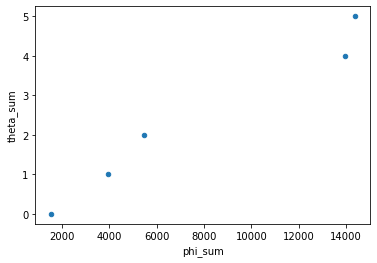

In [108]:
TOPIC_Span.plot.scatter('phi_sum','theta_sum')

In [109]:
PHI_P = (PHI_Span.T / PHI_Span.T.sum())
PHI_I = np.log2(1/PHI_P)
TOPIC_Span['h'] = round((PHI_I * PHI_P).sum().sort_values(ascending=False), 2)

In [110]:
TOPIC_Span['top_terms'] = PHI_Span.apply(lambda x: ' '.join(x.sort_values(ascending=False).head(n_top_terms).index), 1)
TOPIC_Span['label'] = TOPIC_Span.apply(lambda x: f"{x.name}: {x.top_terms}", 1)

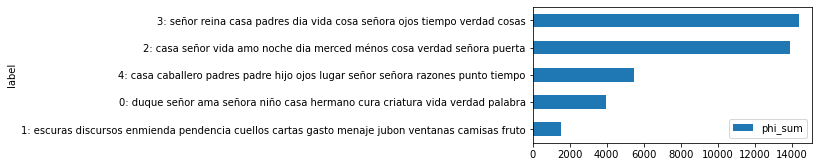

In [111]:
TOPIC_Span.sort_values('phi_sum', ascending=True).plot.barh(y='phi_sum', x='label', figsize=(5, n_topics/2));

In [112]:
THETA_Span.to_csv('LDA_THETA_Spanish.csv')

In [113]:
PHI_Span.T.to_csv('LDA_PHI_Spanish.csv')

##### Both

In [114]:
X = BOW.n.unstack(fill_value=0)[SIGS]
DOC = DOC.set_index(X.index)

In [115]:
lda_engine = LDA(n_components=5, max_iter=max_iter, learning_offset=50., random_state=0)

In [116]:
THETA = pd.DataFrame(lda_engine.fit_transform(X.values), index=X.index)
THETA.columns.name = 'topic_id'

In [117]:
THETA.style.background_gradient(cmap='GnBu', high=.5, axis=1)

,topic_id,0,1,2,3,4
title,chap_num,,,,,
"COLOQUIO QUE PASO ENTRE CIPION Y BERGANZA,",1,0.000046,0.000047,0.000047,0.999814,0.000046
"DIALOGUE BETWEEN SCIPIO AND BERGANZA,",1,0.000046,0.571001,0.428860,0.000046,0.000046
EL AMANTE LIBERAL.,1,0.000061,0.000061,0.000061,0.999756,0.000061
EL CASAMIENTO ENGAÑOSO.,1,0.000218,0.000219,0.000219,0.999126,0.000218
EL CELOSO ESTREMEÑO.,1,0.000077,0.000077,0.000077,0.999692,0.000077
EL LICENCIADO VIDRIERA.,1,0.000108,0.000108,0.000108,0.999567,0.000108
LA ESPAÑOLA INGLESA.,1,0.000067,0.000067,0.000067,0.999731,0.000067
LA FUERZA DE LA SANGRE.,1,0.000136,0.000136,0.000136,0.999454,0.000137
LA ILUSTRE FREGONA.,1,0.000053,0.000053,0.000053,0.999789,0.000053


In [118]:
PHI = pd.DataFrame(lda_engine.components_, columns=X.columns)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [119]:
TOPIC = PHI.sum(1).to_frame('phi_sum')
TOPIC['theta_sum'] = THETA.sum()

<AxesSubplot:xlabel='phi_sum', ylabel='theta_sum'>

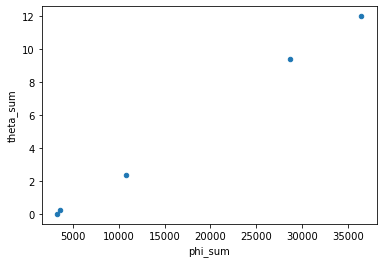

In [120]:
TOPIC.plot.scatter('phi_sum','theta_sum')

In [121]:
PHI_P = (PHI.T / PHI.T.sum())
PHI_I = np.log2(1/PHI_P)
TOPIC['h'] = round((PHI_I * PHI_P).sum().sort_values(ascending=False), 2)

In [122]:
TOPIC['top_terms'] = PHI.apply(lambda x: ' '.join(x.sort_values(ascending=False).head(n_top_terms).index), 1)
TOPIC['label'] = TOPIC.apply(lambda x: f"{x.name}: {x.top_terms}", 1)

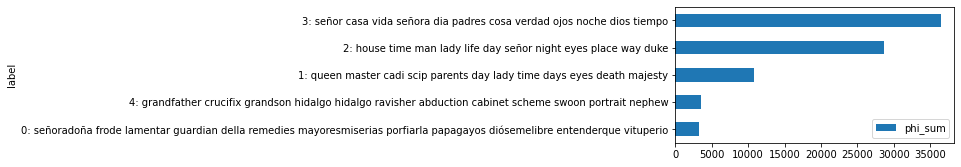

In [123]:
TOPIC.sort_values('phi_sum', ascending=True).plot.barh(y='phi_sum', x='label', figsize=(5, n_topics/2));

#### Sentiment 

In [124]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [125]:
SALEX = pd.read_csv('salex_nrc.csv').set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [126]:
VOCAB_Eng = pd.read_csv('VOCAB_Eng.csv')

In [127]:
SENT_Eng = VOCAB_Eng.join(SALEX, on='term_str')

In [128]:
SENT_Eng = SENT_Eng.dropna()
SENT_Eng.set_index('term_str', inplace=True)

In [129]:
SENT_Eng.to_csv('SENTIMENT_English.csv')

In [130]:
SENT_Eng = SENT_Eng[emo_cols]

In [131]:
CORPUS_Eng = CORPUS_Eng.reset_index()
CORPUS_Eng.set_index('term_str', inplace=True)
CORPUS_Eng = CORPUS_Eng.join(SENT_Eng, on='term_str')
CORPUS_Eng.reset_index(inplace=True)
CORPUS_Eng.drop(columns=['token_str','pos', 'term_str'] + OHCO[1:], inplace=True)

In [132]:
CORPUS_Eng.title.replace({'DIALOGUE BETWEEN SCIPIO AND BERGANZA,':'DIALOGUE BETWEEN SCIPIO AND BERGANZA',
 'EL AMANTE LIBERAL.':'EL AMANTE LIBERAL',
 'EL CASAMIENTO ENGAÑOSO.': 'EL CASAMIENTO ENGAÑOSO',
 'EL CELOSO ESTREMEÑO.':'EL CELOSO ESTREMEÑO',
 'EL LICENCIADO VIDRIERA.':'EL LICENCIADO VIDRIERA',
 'LA ESPAÑOLA INGLESA.':'LA ESPAÑOLA INGLESA',
 'LA FUERZA DE LA SANGRE.':'LA FUERZA DE LA SANGRE',
 'LA ILUSTRE FREGONA.':'LA ILUSTRE FREGONA',
 'LA JITANILLA.':'LA JITANILLA',
 'LA SEÑORA CORNELIA.':'LA SEÑORA CORNELIA',
 'LA TIA FINGIDA.':'LA TIA FINGIDA',
 'LAS DOS DONCELLAS.':'LAS DOS DONCELLAS',
 'RINCONETE AND CORTADILLO:':'RINCONETE AND CORTADILLO',
 'RINCONETE Y CORTADILLO.':'RINCONETE Y CORTADILLO',
 'THE FORCE OF BLOOD.':'THE FORCE OF BLOOD',
 'THE GENEROUS LOVER.':'THE GENEROUS LOVER',
 'THE ILLUSTRIOUS SCULLERY-MAID.':'THE ILLUSTRIOUS SCULLERY-MAID',
 'THE JEALOUS ESTRAMADURAN.':'THE JEALOUS ESTRAMADURAN',
 'THE LADY CORNELIA.':'THE LADY CORNELIA',
 'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE.':'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE',
 'THE LITTLE GIPSY GIRL.': 'THE LITTLE GIPSY GIRL',
 'THE SPANISH-ENGLISH LADY.':'THE SPANISH-ENGLISH LADY',
 'THE TWO DAMSELS.':'THE TWO DAMSELS',
 'COLOQUIO QUE PASO ENTRE CIPION Y BERGANZA,':'COLOQUIO QUE PASÓ ENTRE CIPION Y BERGANZA'}, inplace=True)

In [133]:
BK_SENT_Eng = CORPUS_Eng.groupby('title').mean()

In [134]:
BK_SENT_Eng.to_csv('BOOK_SENT_Eng.csv')

In [135]:
BK_SENT_Eng.drop('polarity', axis=1, inplace=True)

In [136]:
BK_SENT_Eng.style.background_gradient(cmap='GnBu', axis=1)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
title,,,,,,,,
DIALOGUE BETWEEN SCIPIO AND BERGANZA,0.282392,0.291528,0.211794,0.321429,0.352990,0.302326,0.184385,0.463455
RINCONETE AND CORTADILLO,0.226434,0.324795,0.141393,0.296107,0.375000,0.256148,0.160861,0.493852
THE DECEITFUL MARRIAGE,0.230769,0.303167,0.171946,0.212670,0.371041,0.257919,0.153846,0.529412
THE FORCE OF BLOOD,0.159910,0.315315,0.126126,0.272523,0.421171,0.299550,0.173423,0.463964
THE GENEROUS LOVER,0.271645,0.300866,0.156926,0.312771,0.380952,0.294372,0.189394,0.382035
THE ILLUSTRIOUS SCULLERY-MAID,0.200627,0.301985,0.121212,0.245559,0.422153,0.234065,0.175549,0.459770
THE JEALOUS ESTRAMADURAN,0.203947,0.317105,0.146053,0.259211,0.396053,0.276316,0.165789,0.435526
THE LADY CORNELIA,0.154525,0.306843,0.088300,0.273731,0.406181,0.207506,0.183223,0.464680
"THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE",0.242026,0.240150,0.185741,0.294559,0.313321,0.257036,0.114447,0.450281


##### Spanish

In [137]:
VOCAB_Span = pd.read_csv('VOC_Span.csv')

In [138]:
VOCAB_Span.drop('Unnamed: 0', axis=1, inplace=True)

In [139]:
VOCAB_Span.rename(columns={'term_str':'span_str', 'eng_str':'term_str'}, inplace=True)

In [140]:
VOCAB_Span = VOCAB_Span.set_index('term_str')

In [141]:
SENT_Span = VOCAB_Span.join(SALEX, on='term_str')

In [142]:
SENT_Span.reset_index(inplace=True)
SENT_Span.rename(columns={'term_str':'eng_str', 'span_str':'term_str'}, inplace=True)
SENT_Span = SENT_Span.set_index('term_str')

In [143]:
SENT_Span.dropna(inplace=True)

In [144]:
SENT_Span.drop('eng_str', axis=1, inplace=True)

In [145]:
SENT_Span.to_csv('SENTIMENT_Spanish.csv')

In [146]:
SENT_Span = SENT_Span[emo_cols]

In [147]:
SENT_Span

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
term_str,,,,,,,,,
ver,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
preciosa,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
dios,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
buena,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
buen,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
idiotez,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0
desposeido,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0
delicia,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [148]:
CORPUS_Span = CORPUS_Span.reset_index()

In [149]:
CORPUS_Span.set_index('term_str', inplace=True)

In [150]:
CORPUS_Span = CORPUS_Span.join(SENT_Span, on='term_str')

In [151]:
CORPUS_Span.reset_index(inplace=True)

In [152]:
CORPUS_Span.drop(columns=['token_str','pos', 'term_str'] + OHCO[1:], inplace=True)

In [153]:
CORPUS_Span.title.replace({'DIALOGUE BETWEEN SCIPIO AND BERGANZA,':'DIALOGUE BETWEEN SCIPIO AND BERGANZA',
 'EL AMANTE LIBERAL.':'EL AMANTE LIBERAL',
 'EL CASAMIENTO ENGAÑOSO.': 'EL CASAMIENTO ENGAÑOSO',
 'EL CELOSO ESTREMEÑO.':'EL CELOSO ESTREMEÑO',
 'EL LICENCIADO VIDRIERA.':'EL LICENCIADO VIDRIERA',
 'LA ESPAÑOLA INGLESA.':'LA ESPAÑOLA INGLESA',
 'LA FUERZA DE LA SANGRE.':'LA FUERZA DE LA SANGRE',
 'LA ILUSTRE FREGONA.':'LA ILUSTRE FREGONA',
 'LA JITANILLA.':'LA JITANILLA',
 'LA SEÑORA CORNELIA.':'LA SEÑORA CORNELIA',
 'LA TIA FINGIDA.':'LA TIA FINGIDA',
 'LAS DOS DONCELLAS.':'LAS DOS DONCELLAS',
 'RINCONETE AND CORTADILLO:':'RINCONETE AND CORTADILLO',
 'RINCONETE Y CORTADILLO.':'RINCONETE Y CORTADILLO',
 'THE FORCE OF BLOOD.':'THE FORCE OF BLOOD',
 'THE GENEROUS LOVER.':'THE GENEROUS LOVER',
 'THE ILLUSTRIOUS SCULLERY-MAID.':'THE ILLUSTRIOUS SCULLERY-MAID',
 'THE JEALOUS ESTRAMADURAN.':'THE JEALOUS ESTRAMADURAN',
 'THE LADY CORNELIA.':'THE LADY CORNELIA',
 'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE.':'THE LICENTIATE VIDRIERA; OR, DOCTOR GLASS-CASE',
 'THE LITTLE GIPSY GIRL.': 'THE LITTLE GIPSY GIRL',
 'THE SPANISH-ENGLISH LADY.':'THE SPANISH-ENGLISH LADY',
 'THE TWO DAMSELS.':'THE TWO DAMSELS',
 'COLOQUIO QUE PASO ENTRE CIPION Y BERGANZA,':'COLOQUIO QUE PASÓ ENTRE CIPION Y BERGANZA'}, inplace=True)

In [154]:
BK_SENT_Span = CORPUS_Span.groupby('title').mean()

In [155]:
BK_SENT_Span.to_csv('BOOK_SENT_Span.csv')

In [156]:
BK_SENT_Span.drop('polarity', axis=1, inplace=True)

In [157]:
BK_SENT_Span.style.background_gradient(cmap='GnBu', axis=1)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
title,,,,,,,,
COLOQUIO QUE PASÓ ENTRE CIPION Y BERGANZA,0.238743,0.291419,0.207307,0.335599,0.365336,0.292268,0.157179,0.395922
EL AMANTE LIBERAL,0.263277,0.284746,0.174011,0.324294,0.385311,0.319774,0.167232,0.402260
EL CASAMIENTO ENGAÑOSO,0.237864,0.320388,0.160194,0.300971,0.378641,0.310680,0.179612,0.490291
EL CELOSO ESTREMEÑO,0.203927,0.312689,0.125378,0.305136,0.364048,0.335347,0.164653,0.385196
EL LICENCIADO VIDRIERA,0.292740,0.306792,0.210773,0.358314,0.323185,0.297424,0.154567,0.381733
LA ESPAÑOLA INGLESA,0.209559,0.311275,0.126225,0.305147,0.388480,0.237745,0.162990,0.490196
LA FUERZA DE LA SANGRE,0.171429,0.319048,0.135714,0.292857,0.411905,0.321429,0.135714,0.473810
LA ILUSTRE FREGONA,0.219361,0.287333,0.187436,0.293512,0.380021,0.251287,0.156540,0.396498
LA JITANILLA,0.195015,0.412023,0.142962,0.282258,0.510997,0.229472,0.303519,0.369501
